In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor 

# Loading data

In [10]:
from sklearn.datasets import fetch_california_housing
boston_data = fetch_california_housing()
 

In [11]:
boston_data = fetch_california_housing()

In [12]:
boston_data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [13]:
boston_data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [14]:
data = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)

In [15]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [18]:
data['MedInc'] = boston_data.target

In [19]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,4.526,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,3.585,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,3.521,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,3.413,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.422,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   MEDV        20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [21]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,2.068558,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.153956,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.149990,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,1.196000,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,1.797000,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,2.647250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,5.000010,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<AxesSubplot: xlabel='Population'>

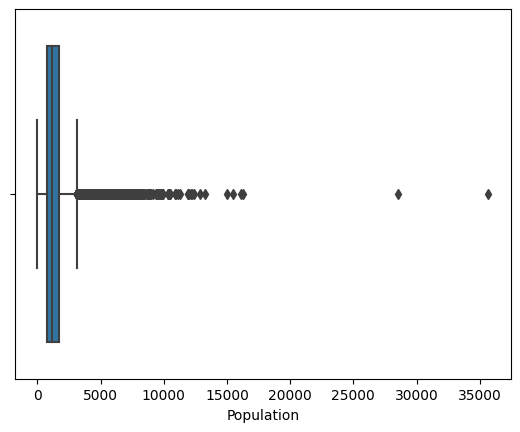

In [22]:
import seaborn as sns
sns.boxplot(x=data['Population'])

In [23]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

MedInc          1.451250
HouseAge       19.000000
AveRooms        1.611665
AveBedrms       0.093447
Population    938.000000
AveOccup        0.852520
Latitude        3.780000
Longitude       3.790000
MEDV            1.451250
dtype: float64


In [24]:
data.shape

(20640, 9)

In [25]:
boston_df_o1 = data.copy()

In [26]:
boston_df_out = boston_df_o1[~((boston_df_o1 < (Q1 - 1.5 * IQR)) |(boston_df_o1 > (Q3 + 1.5 * IQR))).any(axis=1)]
boston_df_out.shape

(16491, 9)

In [27]:
data = boston_df_out.copy()

In [28]:
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
MEDV          0
dtype: int64

In [30]:
x = data.drop(['MedInc'], axis = 1)

In [31]:
y = data['MedInc']

In [32]:
x.head()

,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [33]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedInc, dtype: float64

In [34]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
x = sc_x.fit_transform(x)

In [35]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3)

In [36]:
xtrain.shape

(11543, 8)

In [37]:
xtest.shape

(4948, 8)

# DECISION TREE REGRESSION

In [38]:
from sklearn.tree import DecisionTreeRegressor 
dtr = DecisionTreeRegressor()

In [39]:
dtr.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [40]:
ypred = dtr.predict(xtest)

In [41]:
ypred

array([1.625, 1.972, 0.818, ..., 1.264, 2.894, 2.573])

In [31]:
ytest

122    20.5
451    15.2
215    25.0
8      16.5
117    19.2
       ... 
17     17.5
128    18.0
20     13.6
325    24.6
495    23.1
Name: MEDV, Length: 81, dtype: float64

In [42]:
mean_squared_error(ypred, ytest)

4.38571141875506e-06

# Random Forest

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
rf_regressor =RandomForestRegressor(1000)
rf_regressor.fit(xtrain, ytrain)

RandomForestRegressor(n_estimators=1000)

In [45]:
ypred = rf_regressor.predict(xtest)

In [46]:
mean_squared_error(ypred, ytest)

3.767406844987723e-06